In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import algos, helpers, envs
from lib.helpers import np_exclude
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

import copy
from tqdm import tqdm

import matplotlib
%config InlineBackend.figure_formats = ['svg']

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
})

In [4]:
np.set_printoptions(precision=5, suppress=True)

In [5]:
import numpy as np

In [6]:
Psi = np.array([
    [1,0,1,0],
    [1,0,0,1],
    [0,1,1,0],
    [0,1,0,1],
])

In [7]:
Psi_alt = np.array([
    [0,1],
    [1,0],
    [1,1],
])

In [99]:
np.linalg.pinv(Psi)

array([[ 0.375,  0.375, -0.125, -0.125],
       [-0.125, -0.125,  0.375,  0.375],
       [ 0.375, -0.125,  0.375, -0.125],
       [-0.125,  0.375, -0.125,  0.375]])

In [8]:
Psi @ np.linalg.pinv(Psi)

array([[ 0.75,  0.25,  0.25, -0.25],
       [ 0.25,  0.75, -0.25,  0.25],
       [ 0.25, -0.25,  0.75,  0.25],
       [-0.25,  0.25,  0.25,  0.75]])

In [9]:
Psi @ np.linalg.pinv(Psi) @ np.array([1.8, 1.9, 1, 2])

array([1.575, 2.125, 1.225, 1.775])

In [10]:
Psi @ np.linalg.pinv(Psi) @ np.array([0, 1, 0, 0])

array([ 0.25,  0.75, -0.25,  0.25])

In [11]:
Psi @ np.linalg.pinv(Psi) @ np.array([0, 1, -2, 2])

array([-0.75,  1.75, -1.25,  1.25])

In [12]:
Psi_alt @ np.linalg.pinv(Psi_alt) @ np.array([1, -2, 2])

array([ 2., -1.,  1.])

In [13]:
np.sqrt(np.mean(np.square(np.array([0,1,1,4]) - np.array([0,2,2,4]))))

0.7071067811865476

In [14]:
Psi_alt @ np.linalg.pinv(Psi_alt) @ np.array([1,1,4])

array([1.66667, 1.66667, 3.33333])

In [15]:
np.sqrt(np.mean(np.square(np.array([0,1,1,4]) - np.array([0, 1.66667, 1.66667, 3.33333]))))

0.5773531559409717

In [16]:
Psi @ np.linalg.pinv(Psi) @ np.array([0,1,1,4])

array([-0.5,  1.5,  1.5,  3.5])

In [17]:
np.sqrt(np.mean(np.square(np.array([0,1,1,4]) - np.array([-0.5,  1.5,  1.5,  3.5]))))

0.5

In [18]:
Psi_small = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1],
])

In [19]:
np.linalg.inv(Psi_small.T @ Psi_small)

array([[ 0.66667, -0.33333],
       [-0.33333,  0.66667]])

In [20]:
Psi_small.T @ np.array([0,0,0,1])

array([1, 1])

In [21]:
Psi_small = np.array([
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1],
])

In [22]:
np.linalg.inv(Psi_small.T @ Psi_small)

array([[ 0.75, -0.5 , -0.5 ],
       [-0.5 ,  1.  ,  0.  ],
       [-0.5 ,  0.  ,  1.  ]])

In [23]:
Psi_small.T @ np.array([0,0,0,1])

array([1, 1, 1])

## v1

In [24]:
def bandit_sweepR_plot_v1(R01):
    # Sweep through different R values
    R_list = np.arange(-5, 5.1, 0.05)

    rmse_list = []
    suboptimality_list = []

    for R_i in R_list:
        R = np.array([0, 1, R01, R_i])
        R_approx = Psi @ np.linalg.pinv(Psi) @ R

        rmse_list.append(np.sqrt(np.mean(np.square(R_approx - R))))
        suboptimality_list.append(np.max(R) - R[np.argmax(R_approx)])

    fig, axes = plt.subplots(2,1, sharex=True, figsize=(3,3))
    plt.sca(axes[0])
    plt.plot(R_list, rmse_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
    plt.ylim(0, 4)
    plt.ylabel('RMSE($\hat{Q}$, $Q^*$)')

    plt.sca(axes[1])
    plt.plot(R_list, suboptimality_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
    plt.ylabel('Suboptimality')
    plt.ylim(0, 4)

    plt.xlim(-5-.1, 5.1)
    plt.xlabel('$R$')
    plt.show()

2


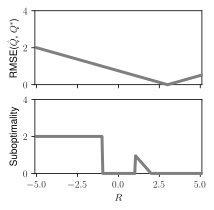

1


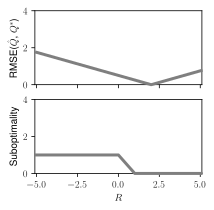

0.5


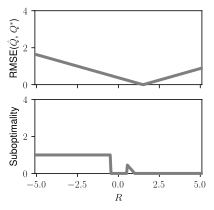

0


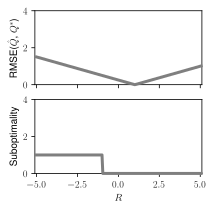

-0.5


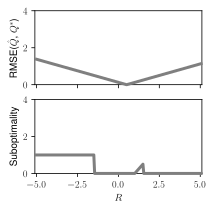

-1


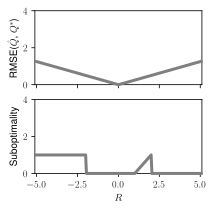

-2


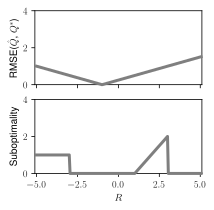

In [25]:
for R01 in [2, 1, 0.5, 0, -0.5, -1, -2]:
    print(R01)
    bandit_sweepR_plot_v1(R01)

## v2

In [26]:
Psi_alt @ np.linalg.pinv(Psi_alt) @ np.array([1, 1, 3])

array([1.33333, 1.33333, 2.66667])

In [27]:
def bandit_sweepR_plot_v2(R01):
    # Sweep through different R values
    R_list = np.arange(-10, 10.1, 0.05)

    rmse_list = []
    suboptimality_list = []

    for R_i in R_list:
        R = np.array([0, 1, R01, R_i])
        R_approx = np.zeros(4)
        R_approx[1:] = Psi_alt @ np.linalg.pinv(Psi_alt) @ R[1:]

        rmse_list.append(np.sqrt(np.mean(np.square(R_approx - R))))
        suboptimality_list.append(np.max(R) - R[np.argmax(R_approx)])

    fig, axes = plt.subplots(2,1, sharex=True, figsize=(3,3))
    plt.sca(axes[0])
    plt.plot(R_list, rmse_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
    plt.ylim(0, 2)
    plt.ylabel('RMSE($\hat{Q}$, $Q^*$)')

    plt.sca(axes[1])
    plt.plot(R_list, suboptimality_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
    plt.ylabel('Suboptimality')
    plt.ylim(0, 2)

    plt.xlim(-10-.1, 10.1)
    plt.xlabel('$R$')
    plt.show()

2


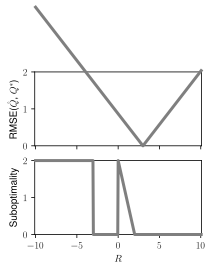

1


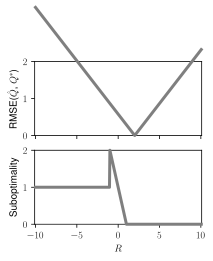

0.5


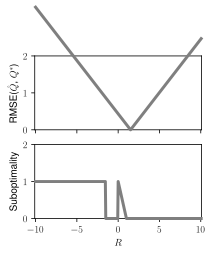

0


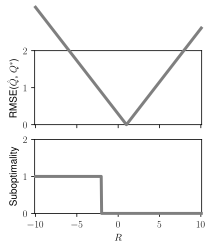

-0.5


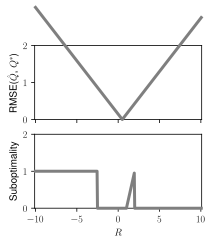

-1


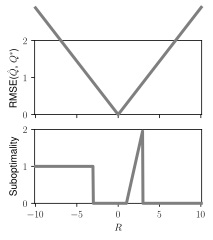

-2


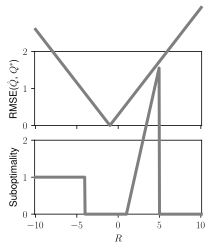

In [28]:
for R01 in [2, 1, 0.5, 0, -0.5, -1, -2]:
    print(R01)
    bandit_sweepR_plot_v2(R01)

## v1 sweep two dimensions

In [29]:
%config InlineBackend.figure_formats = ['retina']

In [30]:
R_list = np.arange(-5, 5.001, 0.05)
rmse_grid = np.full((len(R_list), len(R_list)), np.nan)
suboptimality_grid = np.full((len(R_list), len(R_list)), np.nan)

In [31]:
A = Psi @ np.linalg.pinv(Psi)

In [32]:
for ((i, R_i), (j, R_j)) in itertools.product(enumerate(R_list), enumerate(R_list)):
    R = np.array([0, 1, R_i, R_j])
    R_approx = A @ R

    rmse_grid[i,j] = np.sqrt(np.mean(np.square(R_approx - R)))
    suboptimality_grid[i,j] = np.max(R) - R[np.argmax(R_approx)]

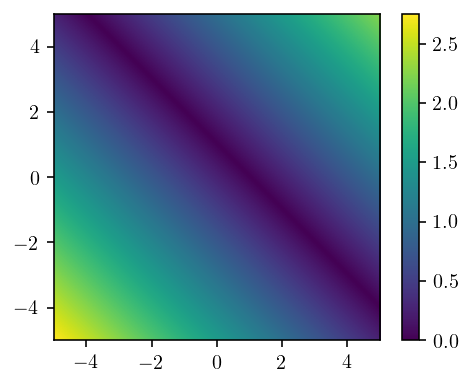

In [33]:
fig, ax = plt.subplots(figsize=(4,3))
plt.imshow(rmse_grid, extent=(R_list[0], R_list[-1], R_list[0], R_list[-1]))
plt.colorbar()
plt.show()

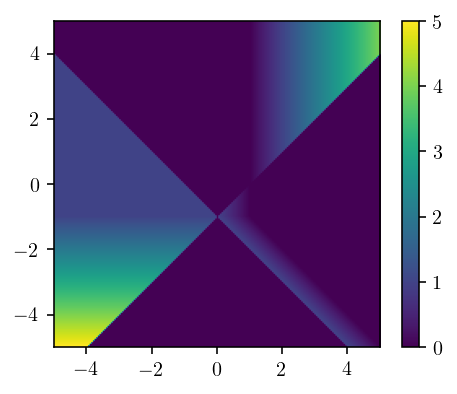

In [34]:
fig, ax = plt.subplots(figsize=(4,3))
plt.imshow(suboptimality_grid, extent=(R_list[0], R_list[-1], R_list[0], R_list[-1]))
plt.colorbar()
plt.show()

In [35]:
np.arange(-5,5.1,1)

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [36]:
R_list[0]

-5.0

In [37]:
len(R_list)

201

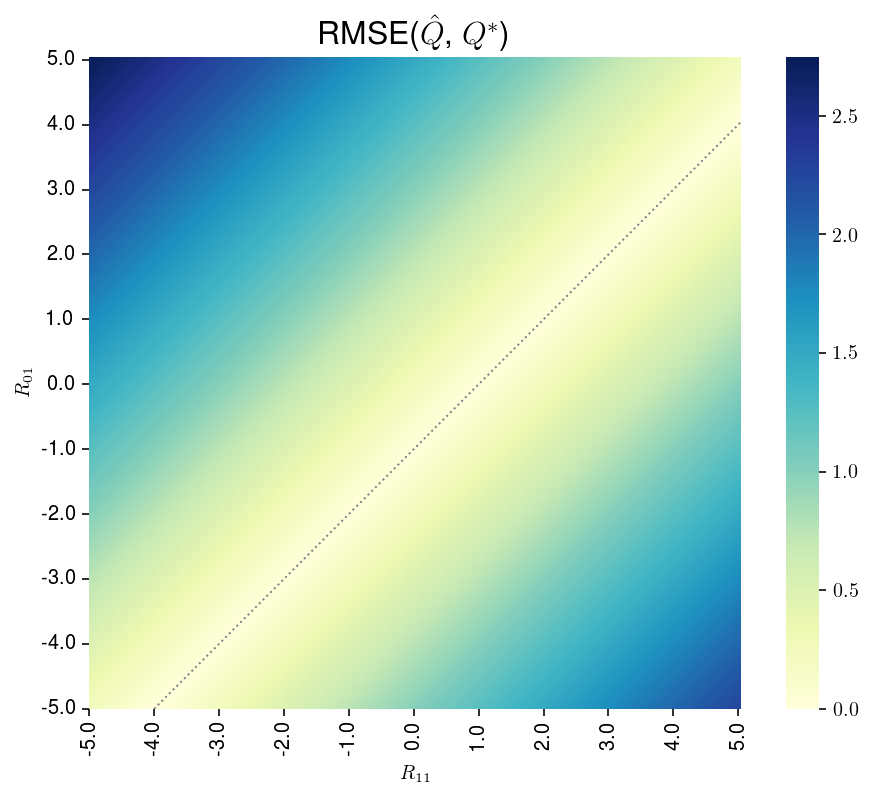

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(
    rmse_grid,
    square=True,
    cmap="YlGnBu",
    ax=ax,
)
ax.invert_yaxis()
plt.xticks(np.arange(0,201,20), np.arange(-5,5.1,1))
plt.yticks(np.arange(0,201,20), np.arange(-5,5.1,1))
plt.ylabel('$R_{01}$')
plt.xlabel('$R_{11}$')

plt.plot([20, 201], [0, 181], ls=':', c='gray', lw=1)

plt.title('RMSE($\hat{Q}$, $Q^*$)', fontsize=16)
plt.show()

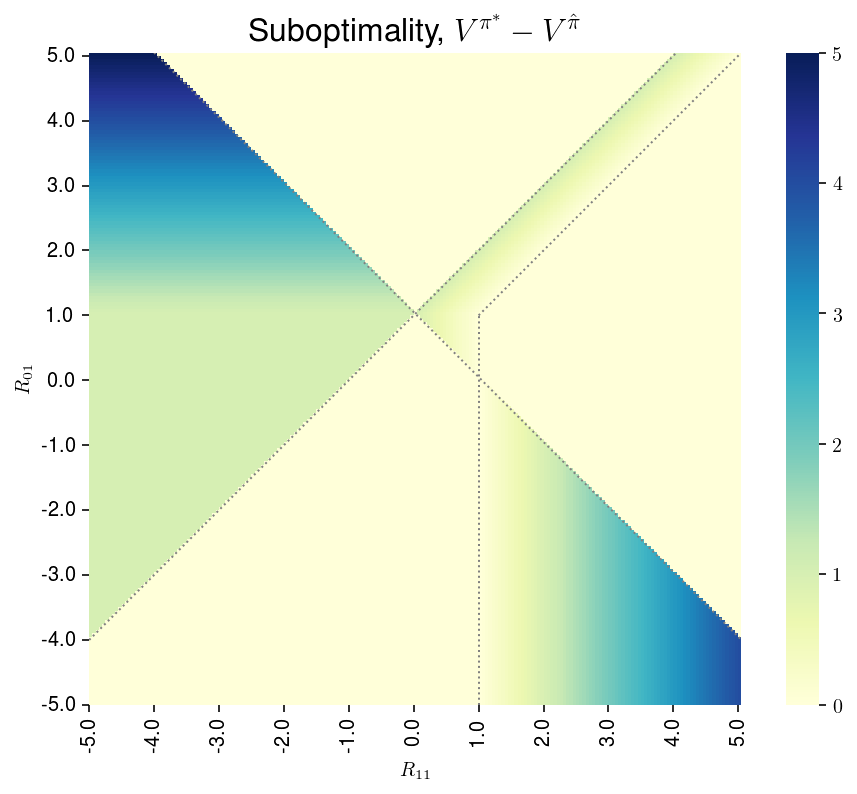

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(
    suboptimality_grid,
    square=True,
    cmap="YlGnBu",
    ax=ax,
)
ax.invert_yaxis()
plt.xticks(np.arange(0,201,20), np.arange(-5,5.1,1))
plt.yticks(np.arange(0,201,20), np.arange(-5,5.1,1))
plt.ylabel('$R_{01}$')
plt.xlabel('$R_{11}$')

plt.plot([0, 181], [20, 201], ls=':', c='gray', lw=1)
plt.plot([20, 201], [201, 20], ls=':', c='gray', lw=1)
plt.plot([120, 120], [0, 120], ls=':', c='gray', lw=1)
plt.plot([120, 201], [120, 201], ls=':', c='gray', lw=1)

plt.title('Suboptimality, $V^{\pi^*} - V^{\hat{\pi}}$', fontsize=16)

plt.show()

## v3 sweep interaction when sub-actions have same size

In [77]:
%config InlineBackend.figure_formats = ['svg']

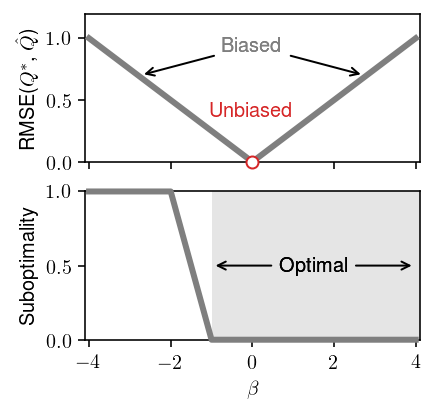

In [130]:
# Sweep through different beta values
alpha = 1
beta_list = np.arange(-4, 4.001, 0.05)

rmse_list = []
suboptimality_list = []

for beta in beta_list:
    R = np.array([0, 1, alpha, 1+alpha+beta])
    R_approx = Psi @ np.linalg.pinv(Psi) @ R

    rmse_list.append(np.sqrt(np.mean(np.square(R_approx - R))))
    suboptimality_list.append(np.max(R) - R[np.argmax(R_approx)])

fig, axes = plt.subplots(2,1, sharex=True, figsize=(3,3))
plt.sca(axes[0])
plt.plot(beta_list, rmse_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylim(0, 1.2)
plt.ylabel('RMSE($Q^*$, $\hat{Q}$)')

plt.sca(axes[1])
plt.plot(beta_list, suboptimality_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylabel('Suboptimality')
plt.ylim(0, 1)

axes[1].fill_between([-1,5.1], [0,0], [1,1], facecolor='gray', alpha=0.2)
axes[0].plot(0, 0, 'o', c='w', mec='tab:red', markersize=6, zorder=10, clip_on=False)
axes[0].annotate('Unbiased', (0,0), (0,0.375), c='tab:red', ha='center')
axes[0].annotate('Biased', (-2.75,0.7), (0,0.9), c='tab:gray', ha='center', arrowprops=dict(arrowstyle='->', color='k'))
axes[0].annotate('Biased', (2.75,0.7), (0,0.9), c='tab:gray', ha='center', arrowprops=dict(arrowstyle='->', color='k'))
axes[1].annotate('Optimal', (-1,0.5), (1.5,0.5), c='k', va='center', ha='center', arrowprops=dict(arrowstyle='->'))
axes[1].annotate('Optimal', (4,0.5), (1.5,0.5), c='k', va='center', ha='center', arrowprops=dict(arrowstyle='->'))

plt.xlim(-4-.1, 4.1)
plt.xlabel(r'$\beta$')
plt.savefig('figures/bandit_rmse_subopt_new.pdf', bbox_inches='tight')

plt.show()

## v3 sweep two dimensions

In [84]:
%config InlineBackend.figure_formats = ['retina']

In [103]:
alpha_list = np.arange(-4, 4.001, 0.05)
beta_list = np.arange(-4, 4.001, 0.05)

In [104]:
rmse_grid = np.full((len(alpha_list), len(beta_list)), np.nan)
suboptimality_grid = np.full((len(alpha_list), len(beta_list)), np.nan)

In [105]:
A = Psi @ np.linalg.pinv(Psi)

In [106]:
for ((i, alpha), (j, beta)) in itertools.product(enumerate(alpha_list), enumerate(beta_list)):
    R = np.array([0, 1, alpha, 1+alpha+beta])
    R_approx = A @ R

    rmse_grid[i,j] = np.sqrt(np.mean(np.square(R_approx - R)))
    suboptimality_grid[i,j] = np.max(R) - R[np.argmax(R_approx)]

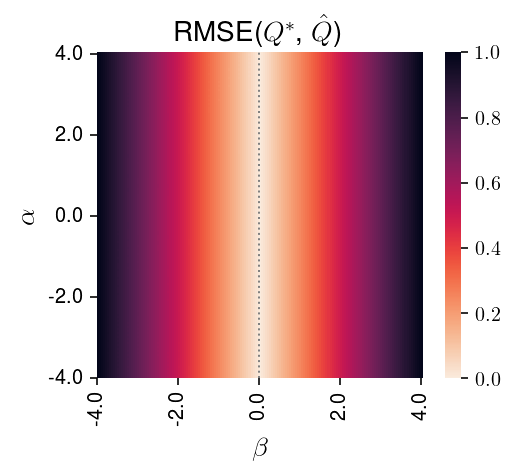

In [118]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(
    rmse_grid,
    square=True,
    cmap="rocket_r",
    ax=ax,
    # cbar_kws=dict(label='RMSE($\hat{Q}$, $Q^*$)'),
)
# ax.figure.axes[-1].yaxis.label.set_size(16)
ax.invert_yaxis()
plt.xticks(np.arange(0,161,40), np.arange(-4,4.1,2))
plt.yticks(np.arange(0,161,40), np.arange(-4,4.1,2))
plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)
plt.title('RMSE($Q^*$, $\hat{Q}$)', fontsize=14)

plt.plot([80, 80], [0, 161], ls=':', c='gray', lw=1)

# plt.text(90, -8, '(a)', c='magenta', ha='center', va='center', fontsize=18, clip_on=False)
# plt.gca().add_patch(patches.Rectangle((95, 0), 10, 200, edgecolor='magenta', facecolor='none', ls='--', lw=2, alpha=0.9, clip_on=False))

plt.savefig('figures/bandit_heatmap_RMSE.pdf', bbox_inches='tight')
plt.savefig('figures/bandit_heatmap_RMSE.png', dpi=300, bbox_inches='tight')
plt.show()

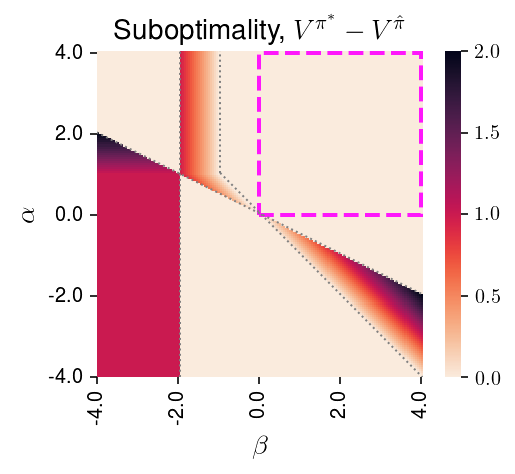

In [119]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(
    suboptimality_grid,
    square=True,
    cmap="rocket_r",
    ax=ax,
    # cbar_kws=dict(label='Suboptimality, $V^{\pi^*} - V^{\hat{\pi}}$'),
)
ax.figure.axes[-1].set_yticks([0, 0.5, 1, 1.5, 2])
# ax.figure.axes[-1].yaxis.label.set_size(16)
ax.invert_yaxis()
plt.xticks(np.arange(0,161,40), np.arange(-4,4.1,2))
plt.yticks(np.arange(0,161,40), np.arange(-4,4.1,2))
plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)
plt.title('Suboptimality, $V^{\pi^*} - V^{\hat{\pi}}$', fontsize=14)

plt.plot([41, 41], [0, 161], ls=':', c='gray', lw=1)
plt.plot([0, 161], [121, 41], ls=':', c='gray', lw=1)
plt.plot([61, 161], [101, 0], ls=':', c='gray', lw=1)
plt.plot([61, 61], [101, 161], ls=':', c='gray', lw=1)

# plt.gca().annotate('(b)', (190, 190), c='magenta', ha='center', va='center', fontsize=18)
plt.gca().add_patch(patches.Rectangle((80, 80), 80, 80, edgecolor='magenta', facecolor='none', ls='--', lw=2, alpha=0.9, clip_on=False))

plt.savefig('figures/bandit_heatmap_subopt.pdf', bbox_inches='tight')
plt.savefig('figures/bandit_heatmap_subopt.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
def bandit_sweepR_plot_v1(R01):
    # Sweep through different R values
    R_list = np.arange(-10, 10.1, 0.05)

    rmse_list = []
    suboptimality_list = []

    for R_i in R_list:
        R = np.array([0, 1, R01, R_i])
        R_approx = Psi @ np.linalg.pinv(Psi) @ R

        rmse_list.append(np.sqrt(np.mean(np.square(R_approx - R))))
        suboptimality_list.append(np.max(R) - R[np.argmax(R_approx)])

    fig, axes = plt.subplots(2,1, sharex=True, figsize=(3,3))
    plt.sca(axes[0])
    plt.plot(R_list, rmse_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
    plt.ylim(0, 2)
    plt.ylabel('RMSE($\hat{Q}$, $Q^*$)')

    plt.sca(axes[1])
    plt.plot(R_list, suboptimality_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
    plt.ylabel('Suboptimality')
    plt.ylim(0, 2)

    plt.xlim(-10-.1, 10.1)
    plt.xlabel('$R$')
    plt.show()

2


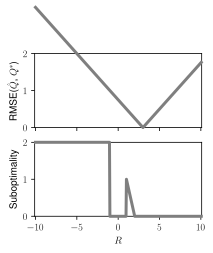

1


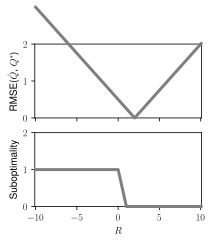

0.5


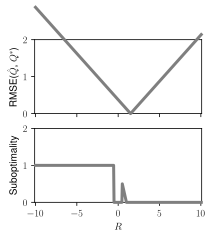

0


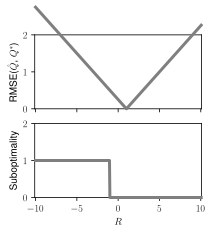

-0.5


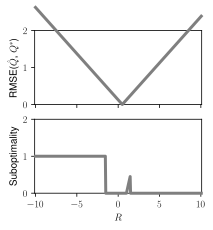

-1


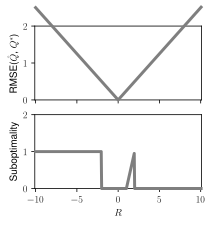

-2


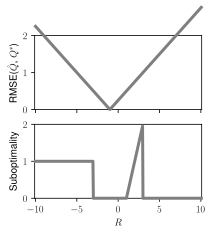

In [34]:
for R01 in [2, 1, 0.5, 0, -0.5, -1, -2]:
    print(R01)
    bandit_sweepR_plot_v1(R01)

## Case

In [23]:
# Sweep through different R values
R_list = np.arange(-10, 10.1, 0.05)

rmse_list = []
suboptimality_list = []

for R_i in R_list:
    R = np.array([0, 1, 1, R_i])
    R_approx = Psi @ np.linalg.pinv(Psi) @ R
    
    rmse_list.append(np.sqrt(np.mean(np.square(R_approx - R))))
    suboptimality_list.append(np.max(R) - R[np.argmax(R_approx)])

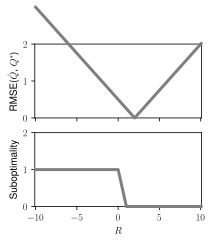

In [24]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(3,3))
plt.sca(axes[0])
plt.plot(R_list, rmse_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylim(0, 2)
plt.ylabel('RMSE($\hat{Q}$, $Q^*$)')

plt.sca(axes[1])
plt.plot(R_list, suboptimality_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylabel('Suboptimality')
plt.ylim(0, 2)

plt.xlim(-10-.1, 10.1)
plt.xlabel('$R$')
plt.show()

## Case

In [21]:
# Sweep through different R values
R_list = np.arange(-10, 10.1, 0.05)

rmse_list = []
suboptimality_list = []

for R_i in R_list:
    R = np.array([0, 1, 2, R_i])
    R_approx = Psi @ np.linalg.pinv(Psi) @ R
    
    rmse_list.append(np.sqrt(np.mean(np.square(R_approx - R))))
    suboptimality_list.append(np.max(R) - R[np.argmax(R_approx)])

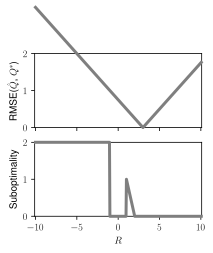

In [22]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(3,3))
plt.sca(axes[0])
plt.plot(R_list, rmse_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylim(0, 2)
plt.ylabel('RMSE($\hat{Q}$, $Q^*$)')

plt.sca(axes[1])
plt.plot(R_list, suboptimality_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylabel('Suboptimality')
plt.ylim(0, 2)

plt.xlim(-10-.1, 10.1)
plt.xlabel('$R$')
plt.show()

## Case

In [25]:
# Sweep through different R values
R_list = np.arange(-10, 10.1, 0.05)

rmse_list = []
suboptimality_list = []

for R_i in R_list:
    R = np.array([0, 1, 0.5, R_i])
    R_approx = Psi @ np.linalg.pinv(Psi) @ R
    
    rmse_list.append(np.sqrt(np.mean(np.square(R_approx - R))))
    suboptimality_list.append(np.max(R) - R[np.argmax(R_approx)])

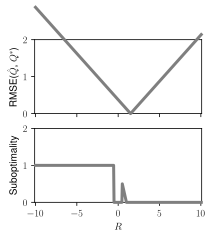

In [26]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(3,3))
plt.sca(axes[0])
plt.plot(R_list, rmse_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylim(0, 2)
plt.ylabel('RMSE($\hat{Q}$, $Q^*$)')

plt.sca(axes[1])
plt.plot(R_list, suboptimality_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylabel('Suboptimality')
plt.ylim(0, 2)

plt.xlim(-10-.1, 10.1)
plt.xlabel('$R$')
plt.show()

## Case

In [27]:
# Sweep through different R values
R_list = np.arange(-10, 10.1, 0.05)

rmse_list = []
suboptimality_list = []

for R_i in R_list:
    R = np.array([0, 1, -0.5, R_i])
    R_approx = Psi @ np.linalg.pinv(Psi) @ R
    
    rmse_list.append(np.sqrt(np.mean(np.square(R_approx - R))))
    suboptimality_list.append(np.max(R) - R[np.argmax(R_approx)])

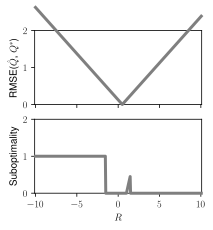

In [28]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(3,3))
plt.sca(axes[0])
plt.plot(R_list, rmse_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylim(0, 2)
plt.ylabel('RMSE($\hat{Q}$, $Q^*$)')

plt.sca(axes[1])
plt.plot(R_list, suboptimality_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylabel('Suboptimality')
plt.ylim(0, 2)

plt.xlim(-10-.1, 10.1)
plt.xlabel('$R$')
plt.show()

## Case

In [29]:
# Sweep through different R values
R_list = np.arange(-10, 10.1, 0.05)

rmse_list = []
suboptimality_list = []

for R_i in R_list:
    R = np.array([0, 1, -1, R_i])
    R_approx = Psi @ np.linalg.pinv(Psi) @ R
    
    rmse_list.append(np.sqrt(np.mean(np.square(R_approx - R))))
    suboptimality_list.append(np.max(R) - R[np.argmax(R_approx)])

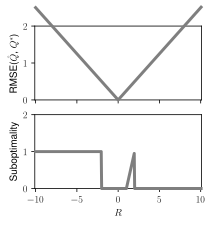

In [30]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(3,3))
plt.sca(axes[0])
plt.plot(R_list, rmse_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylim(0, 2)
plt.ylabel('RMSE($\hat{Q}$, $Q^*$)')

plt.sca(axes[1])
plt.plot(R_list, suboptimality_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylabel('Suboptimality')
plt.ylim(0, 2)

plt.xlim(-10-.1, 10.1)
plt.xlabel('$R$')
plt.show()

## Case

In [31]:
# Sweep through different R values
R_list = np.arange(-10, 10.1, 0.05)

rmse_list = []
suboptimality_list = []

for R_i in R_list:
    R = np.array([0, 1, -2, R_i])
    R_approx = Psi @ np.linalg.pinv(Psi) @ R
    
    rmse_list.append(np.sqrt(np.mean(np.square(R_approx - R))))
    suboptimality_list.append(np.max(R) - R[np.argmax(R_approx)])

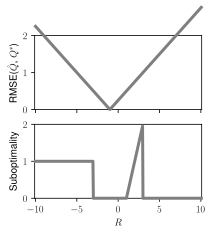

In [32]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(3,3))
plt.sca(axes[0])
plt.plot(R_list, rmse_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylim(0, 2)
plt.ylabel('RMSE($\hat{Q}$, $Q^*$)')

plt.sca(axes[1])
plt.plot(R_list, suboptimality_list, '-', c='tab:gray', lw=3, markersize=3, zorder=10, clip_on=False)
plt.ylabel('Suboptimality')
plt.ylim(0, 2)

plt.xlim(-10-.1, 10.1)
plt.xlabel('$R$')
plt.show()